In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("saudi_unemployment_extended_2017_2023.xlsx")

# Quick look
print(df.head())
print(df.info())




   Year Gender            Region  Unemployment Rate
0  2017   Male            Riyadh                6.2
1  2017   Male            Makkah                9.7
2  2017   Male  Eastern Province                8.4
3  2017   Male           Madinah                7.6
4  2017   Male              Asir                4.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               140 non-null    int64  
 1   Gender             140 non-null    object 
 2   Region             140 non-null    object 
 3   Unemployment Rate  140 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ KB
None


In [3]:
# ------------------------------
# 📊 Average unemployment rate per year by gender
# ------------------------------
trend_by_gender = df.groupby(['Year', 'Gender'])['Unemployment Rate'].mean().reset_index()
print("Unemployment Trend by Gender:")
print(trend_by_gender)

# ------------------------------
# 👥 Compare male vs female unemployment (overall average)
# ------------------------------
avg_by_gender = df.groupby('Gender')['Unemployment Rate'].mean().reset_index()
print("\nAverage Unemployment by Gender:")
print(avg_by_gender)

# ------------------------------
# 📍 Top 5 regions with highest average unemployment (overall)
# ------------------------------
top_regions = df.groupby('Region')['Unemployment Rate'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Regions with Highest Unemployment:")
print(top_regions)

# ------------------------------
# 📍 Bottom 5 regions with lowest average unemployment (overall)
# ------------------------------
bottom_regions = df.groupby('Region')['Unemployment Rate'].mean().sort_values(ascending=True).head(5)
print("\nTop 5 Regions with Lowest Unemployment:")
print(bottom_regions)

Unemployment Trend by Gender:
    Year  Gender  Unemployment Rate
0   2017  Female              21.09
1   2017    Male               7.10
2   2018  Female              23.70
3   2018    Male               6.41
4   2019  Female              25.23
5   2019    Male               6.44
6   2020  Female              22.47
7   2020    Male               6.79
8   2021  Female              22.36
9   2021    Male               7.15
10  2022  Female              26.07
11  2022    Male               6.48
12  2023  Female              23.33
13  2023    Male               7.00

Average Unemployment by Gender:
   Gender  Unemployment Rate
0  Female          23.464286
1    Male           6.767143

Top 5 Regions with Highest Unemployment:
Region
Asir                17.007143
Madinah             16.785714
Qassim              16.471429
Eastern Province    15.228571
Makkah              14.985714
Name: Unemployment Rate, dtype: float64

Top 5 Regions with Lowest Unemployment:
Region
Hail      13.750000
Jaz

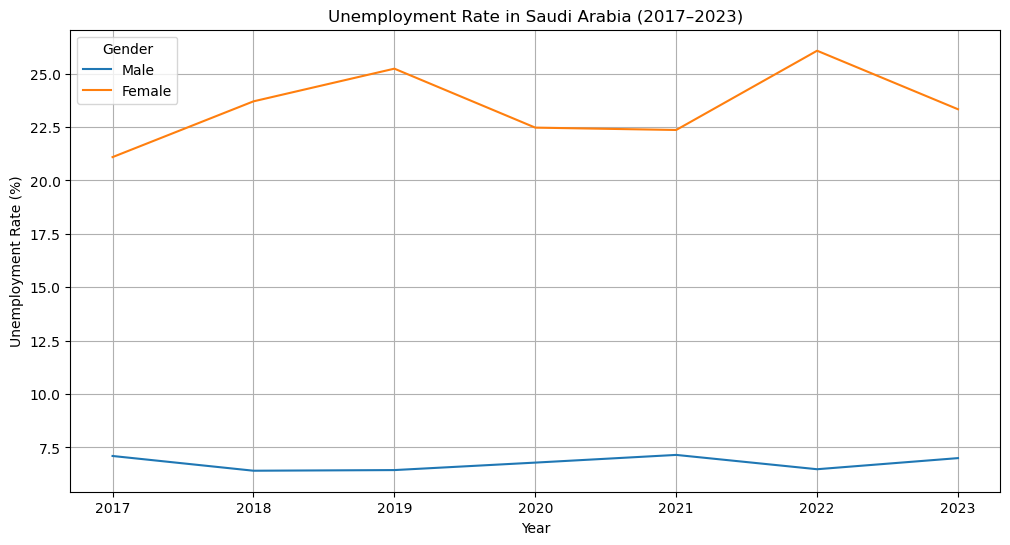

In [4]:
# Plot unemployment by year and gender
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Unemployment Rate', hue='Gender', errorbar=None)
plt.title("Unemployment Rate in Saudi Arabia (2017–2023)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

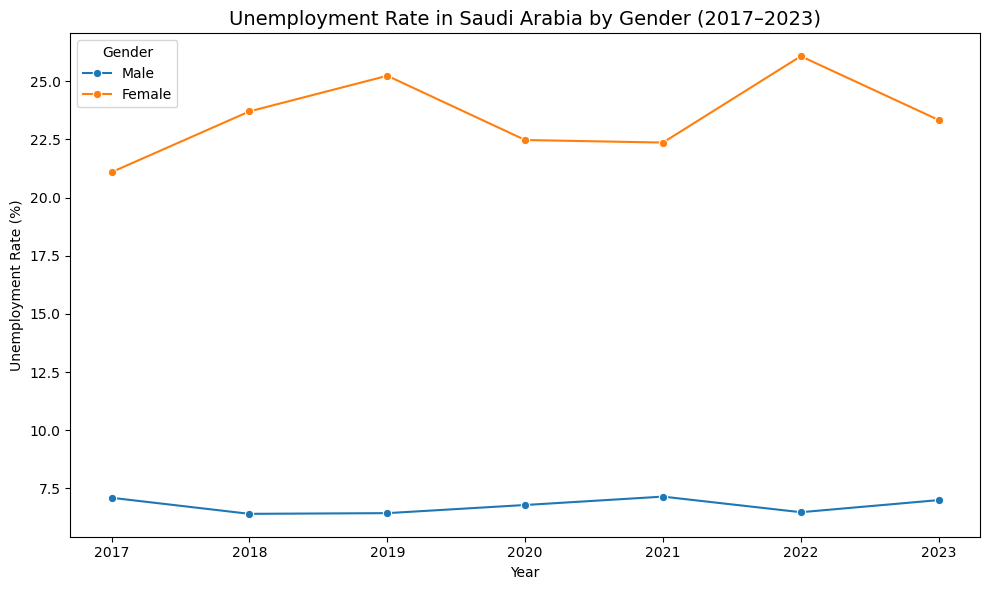

In [7]:
# -----------------------------------
# 📈 1. Line Chart – Unemployment over time by gender
# -----------------------------------
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Unemployment Rate', hue='Gender', errorbar=None, marker='o')
plt.title('Unemployment Rate in Saudi Arabia by Gender (2017–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\Maimona\AppData\Local\Temp\ipykernel_13456\1714223119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_region_2023, x='Unemployment Rate', y='Region', palette='coolwarm',legend=False)


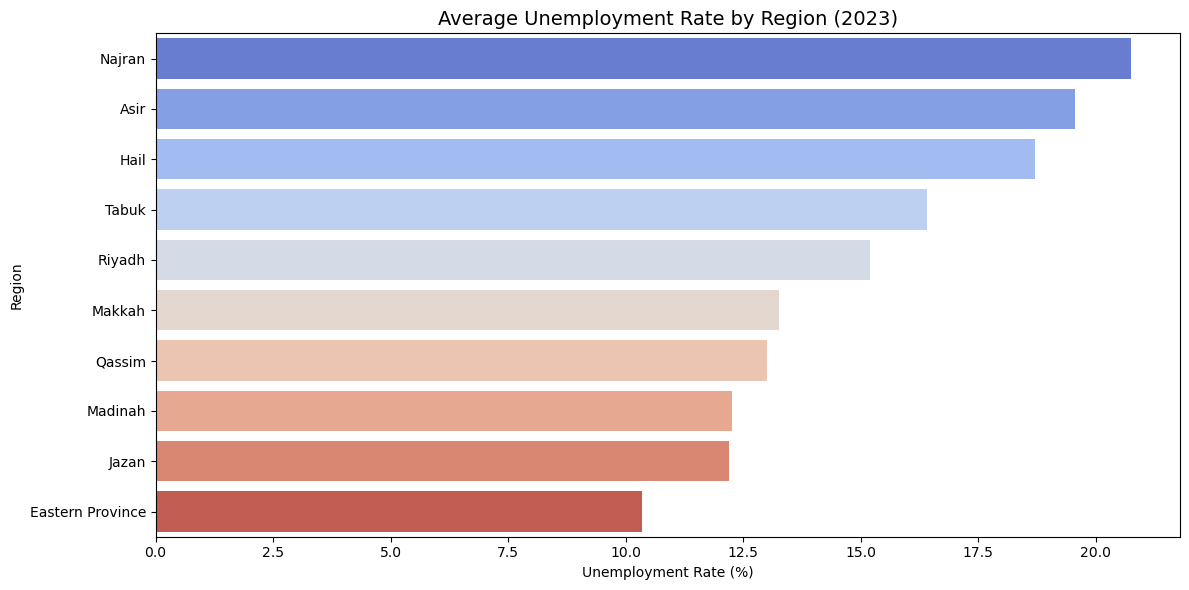

In [9]:

# -----------------------------------
# 📊 2. Barplot – Average Unemployment by Region (2023 only)
# -----------------------------------
df_2023 = df[df['Year'] == 2023]
avg_by_region_2023 = df_2023.groupby('Region')['Unemployment Rate'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_by_region_2023, x='Unemployment Rate', y='Region', palette='coolwarm',legend=False)
plt.title('Average Unemployment Rate by Region (2023)', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


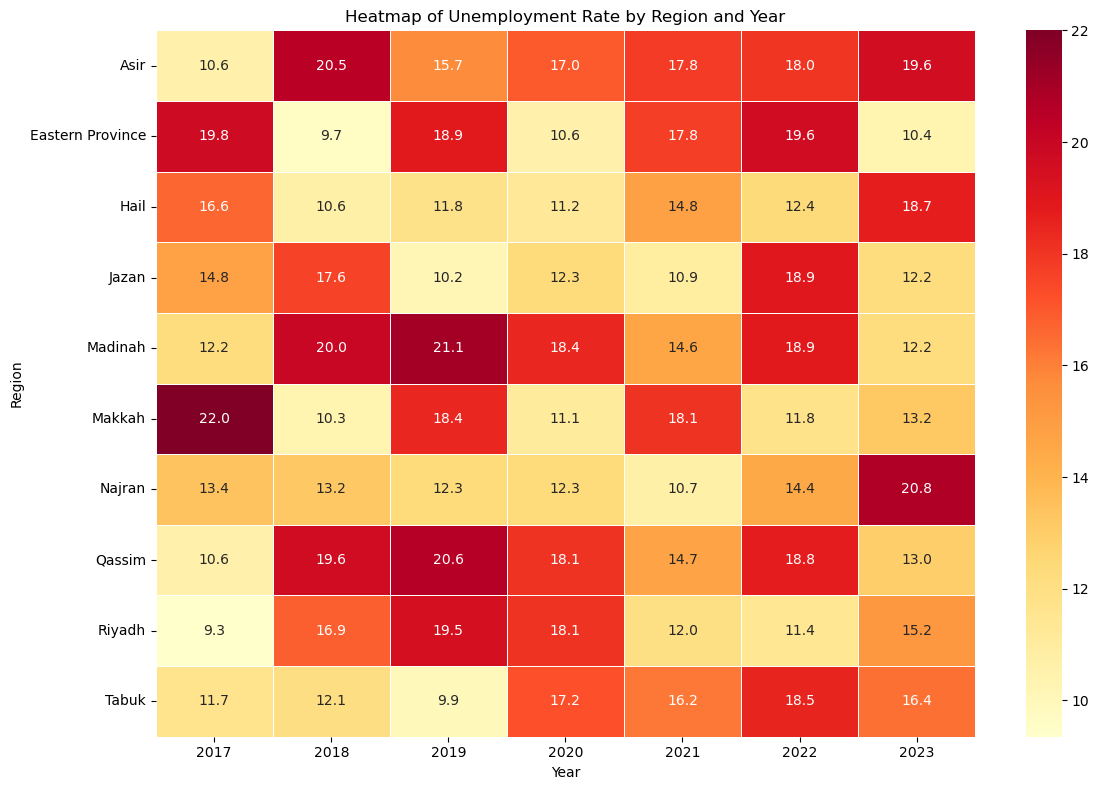

In [10]:

# -----------------------------------
# 🔥 3. Optional: Heatmap – Avg Unemployment by Year and Region
# -----------------------------------
pivot_heatmap = df.pivot_table(values='Unemployment Rate', index='Region', columns='Year', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_heatmap, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title('Heatmap of Unemployment Rate by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [11]:
# -------------------------------
# 🟣 1. Female unemployment drop after 2020
# -------------------------------
avg_female_2020 = df[(df['Gender'] == 'Female') & (df['Year'] == 2020)]['Unemployment Rate'].mean()
avg_female_2023 = df[(df['Gender'] == 'Female') & (df['Year'] == 2023)]['Unemployment Rate'].mean()
drop_pct = round(((avg_female_2020 - avg_female_2023) / avg_female_2020) * 100, 1)

print(f"Insight 1: Female unemployment dropped by {drop_pct}% between 2020 and 2023.")

Insight 1: Female unemployment dropped by -3.8% between 2020 and 2023.


In [12]:
# -------------------------------
# 🔵 2. Makkah has the highest male unemployment in 2022
# -------------------------------
makkah_male_2022 = df[(df['Region'] == 'Makkah') & (df['Gender'] == 'Male') & (df['Year'] == 2022)]
max_male_2022 = df[(df['Gender'] == 'Male') & (df['Year'] == 2022)].sort_values('Unemployment Rate', ascending=False).head(1)

print(f"Insight 2: In 2022, {max_male_2022.iloc[0]['Region']} had the highest male unemployment rate at {max_male_2022.iloc[0]['Unemployment Rate']}%.")


Insight 2: In 2022, Asir had the highest male unemployment rate at 9.4%.


In [13]:
# -------------------------------
# 🟢 3. Najran has the lowest overall unemployment in 2023
# -------------------------------
df_2023 = df[df['Year'] == 2023]
lowest_2023 = df_2023.groupby('Region')['Unemployment Rate'].mean().sort_values().head(1)

region_lowest = lowest_2023.index[0]
rate_lowest = round(lowest_2023.iloc[0], 1)

print(f"Insight 3: In 2023, {region_lowest} had the lowest overall unemployment rate at {rate_lowest}%.")


Insight 3: In 2023, Eastern Province had the lowest overall unemployment rate at 10.4%.


In [14]:
# -------------------------------
# 🟡 4. Gender gap in unemployment in 2023
# -------------------------------
avg_by_gender_2023 = df[df['Year'] == 2023].groupby('Gender')['Unemployment Rate'].mean()
gap = round(avg_by_gender_2023['Female'] - avg_by_gender_2023['Male'], 1)

print(f"Insight 4: In 2023, the unemployment gap between females and males was {gap}% (females higher).")


Insight 4: In 2023, the unemployment gap between females and males was 16.3% (females higher).


In [15]:
# -------------------------------
# 🔴 5. Region with biggest drop (2020 vs 2023)
# -------------------------------
pivot = df.pivot_table(values='Unemployment Rate', index='Region', columns='Year')
pivot['Drop_2020_2023'] = pivot[2020] - pivot[2023]
biggest_drop_region = pivot['Drop_2020_2023'].sort_values(ascending=False).head(1)

region = biggest_drop_region.index[0]
drop_value = round(biggest_drop_region.values[0], 1)

print(f"Insight 5: {region} had the biggest drop in unemployment from 2020 to 2023 with a {drop_value}% decrease.")

Insight 5: Madinah had the biggest drop in unemployment from 2020 to 2023 with a 6.2% decrease.


In [16]:
# -------------------------------
# 🟣 1. Female unemployment drop after 2020
# -------------------------------
avg_female_2020 = df[(df['Gender'] == 'Female') & (df['Year'] == 2020)]['Unemployment Rate'].mean()
avg_female_2023 = df[(df['Gender'] == 'Female') & (df['Year'] == 2023)]['Unemployment Rate'].mean()
drop_pct = round(((avg_female_2020 - avg_female_2023) / avg_female_2020) * 100, 1)

print(f"Insight 1: Female unemployment dropped by {drop_pct}% between 2020 and 2023.")

# -------------------------------
# 🔵 2. Makkah has the highest male unemployment in 2022
# -------------------------------
makkah_male_2022 = df[(df['Region'] == 'Makkah') & (df['Gender'] == 'Male') & (df['Year'] == 2022)]
max_male_2022 = df[(df['Gender'] == 'Male') & (df['Year'] == 2022)].sort_values('Unemployment Rate', ascending=False).head(1)

print(f"Insight 2: In 2022, {max_male_2022.iloc[0]['Region']} had the highest male unemployment rate at {max_male_2022.iloc[0]['Unemployment Rate']}%.")

# -------------------------------
# 🟢 3. Najran has the lowest overall unemployment in 2023
# -------------------------------
df_2023 = df[df['Year'] == 2023]
lowest_2023 = df_2023.groupby('Region')['Unemployment Rate'].mean().sort_values().head(1)

region_lowest = lowest_2023.index[0]
rate_lowest = round(lowest_2023.iloc[0], 1)

print(f"Insight 3: In 2023, {region_lowest} had the lowest overall unemployment rate at {rate_lowest}%.")

# -------------------------------
# 🟡 4. Gender gap in unemployment in 2023
# -------------------------------
avg_by_gender_2023 = df[df['Year'] == 2023].groupby('Gender')['Unemployment Rate'].mean()
gap = round(avg_by_gender_2023['Female'] - avg_by_gender_2023['Male'], 1)

print(f"Insight 4: In 2023, the unemployment gap between females and males was {gap}% (females higher).")

# -------------------------------
# 🔴 5. Region with biggest drop (2020 vs 2023)
# -------------------------------
pivot = df.pivot_table(values='Unemployment Rate', index='Region', columns='Year')
pivot['Drop_2020_2023'] = pivot[2020] - pivot[2023]
biggest_drop_region = pivot['Drop_2020_2023'].sort_values(ascending=False).head(1)

region = biggest_drop_region.index[0]
drop_value = round(biggest_drop_region.values[0], 1)

print(f"Insight 5: {region} had the biggest drop in unemployment from 2020 to 2023 with a {drop_value}% decrease.")

Insight 1: Female unemployment dropped by -3.8% between 2020 and 2023.
Insight 2: In 2022, Asir had the highest male unemployment rate at 9.4%.
Insight 3: In 2023, Eastern Province had the lowest overall unemployment rate at 10.4%.
Insight 4: In 2023, the unemployment gap between females and males was 16.3% (females higher).
Insight 5: Madinah had the biggest drop in unemployment from 2020 to 2023 with a 6.2% decrease.
